# 1 Data wrangling<a id='1_Data_wrangling'></a>

## 1.1 Introduction<a id='1.1_Introduction'></a>

This step focuses on collecting the data, organizing it, cleaning it and making sure it's well defined. 

## 1.2 Imports<a id='1.2_Imports'></a>

In [1]:
# Import functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import statsmodels.api as sm
import os
from library.sb_utils import save_file
from sklearn import datasets,linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from datetime import datetime

## 1.3 Objectives<a id='1.3_Objectives'></a>

This step of your capstone is all about preparing your data for future pre-processing and analysis.

## 1.4 Load Data

### 1.4.1 Load CO2 Emission Data

In [2]:
# the supplied xlsx data file is the raw_data directory
co2_raw_data = pd.read_excel('../raw_data/co2_emission_data_with_popu_gdp.xlsx')

In [3]:
#Call the info method on co2_raw_data to see a summary of the data
co2_raw_data.info()
# join temperature, latitude, logitude, by iso_code

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             20930 non-null  object 
 1   country                              23708 non-null  object 
 2   year                                 23708 non-null  int64  
 3   annual_co2_prod_Megaton              23170 non-null  float64
 4   co2_growth_prct                      21910 non-null  float64
 5   co2_growth_abs                       22017 non-null  float64
 6   consumption_co2                      3350 non-null   float64
 7   trade_co2                            3318 non-null   float64
 8   trade_co2_share                      3318 non-null   float64
 9   co2_per_capita                       22383 non-null  float64
 10  consumption_co2_per_capita           3350 non-null   float64
 11  share_global_co2            

In [4]:
#Call the head method on co2_raw_data to print the first several rows of the data
co2_raw_data.head()

,iso_code,country,year,annual_co2_prod_Megaton,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption_10Gwh,energy_per_capita,energy_per_gdp,population,gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,NaN,0.002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950,0.084,475.000,0.070,NaN,NaN,NaN,0.011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951,0.092,8.696,0.007,NaN,NaN,NaN,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952,0.092,NaN,NaN,NaN,NaN,NaN,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953,0.106,16.000,0.015,NaN,NaN,NaN,0.013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10


In [5]:
co2_raw_data.describe()

,year,annual_co2_prod_Megaton,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,consumption_co2_per_capita,share_global_co2,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption_10Gwh,energy_per_capita,energy_per_gdp,population,gdp
count,23708.000000,23170.000000,21910.000000,22017.000000,3350.000000,3318.000000,3318.000000,22383.000000,3350.000000,23103.000000,...,5155.000000,5211.000000,5157.000000,5211.000000,5157.000000,6044.000000,6044.000000,6044.000000,2.107100e+04,1.300200e+04
mean,1951.670997,270.245818,17.705591,5.784158,222.596056,3.673305,27.047046,4.059490,6.556161,5.155362,...,8.099506,82.253370,2.046923,29.308135,0.606690,1638.281196,27401.710621,2.293554,5.927539e+07,4.396605e+11
std,53.828319,1509.911932,290.750382,54.859594,773.261390,100.251878,52.599781,15.339885,7.303592,18.014885,...,9.387477,566.702756,3.534126,199.291118,0.844671,9666.490291,33293.462203,1.681657,3.730743e+08,3.666682e+12
min,1750.000000,-1.165000,-2835.714000,-860.211000,-1.344000,-1487.155000,-118.238000,-2.675000,-0.396000,-0.030000,...,-50.487000,0.000000,0.000000,0.000000,0.000000,0.208000,111.472000,0.048000,1.000000e+03,6.378000e+07
25%,1922.000000,0.546000,-1.070000,-0.011000,8.942000,0.000000,0.000000,0.234000,1.100500,0.006000,...,2.514000,2.150000,0.715000,0.535000,0.228000,46.319000,5829.803000,1.247000,1.333018e+06,8.926728e+09
50%,1965.000000,5.168000,4.361000,0.088000,36.854000,2.348000,16.319500,1.209000,4.040000,0.072000,...,5.474000,9.030000,1.111000,3.590000,0.384000,148.790500,15359.988500,1.823500,4.856304e+06,2.966217e+10
75%,1993.000000,44.799000,11.450750,1.272000,141.397000,9.545500,40.842000,4.632500,9.829750,0.626000,...,10.299000,31.055000,1.690000,10.570000,0.607000,518.953000,37103.698250,2.700500,1.594407e+07,1.210000e+11
max,2019.000000,36441.388000,20100.000000,1667.711000,8959.962000,533.928000,1470.066000,794.334000,58.736000,100.000000,...,86.991000,8660.010000,39.812000,3054.000000,8.239000,153848.433000,317582.244000,14.939000,7.713468e+09,1.065610e+14


In [6]:
type(co2_raw_data)

pandas.core.frame.DataFrame

### 1.4.2 Load agriculture land use data

In [7]:
agri_land_raw_data = pd.read_csv('../raw_data/UNDATA_FAOSTAT_AgriculturalLand.csv')

In [8]:
agri_land_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14378 entries, 0 to 14377
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country or Area         14377 non-null  object 
 1   Element                 14377 non-null  object 
 2   Year                    14369 non-null  float64
 3   Unit                    14369 non-null  object 
 4   Value_agri_1000hectare  14369 non-null  float64
 5   Value Footnotes         14369 non-null  object 
dtypes: float64(2), object(4)
memory usage: 674.1+ KB


In [9]:
agri_land_raw_data.head()

,Country or Area,Element,Year,Unit,Value_agri_1000hectare,Value Footnotes
0,Afghanistan,Area,2018.0,1000 ha,37919.0,Q
1,Afghanistan,Area,2017.0,1000 ha,37910.0,Q
2,Afghanistan,Area,2016.0,1000 ha,37910.0,Q
3,Afghanistan,Area,2015.0,1000 ha,37910.0,Q
4,Afghanistan,Area,2014.0,1000 ha,37910.0,Q


In [10]:
agri_land_raw_data.describe()

,Year,Value_agri_1000hectare
count,14369.000000,1.436900e+04
mean,1990.245111,9.375771e+04
std,16.763517,3.575405e+05
min,1961.000000,3.000000e-01
25%,1976.000000,1.350000e+02
50%,1991.000000,3.726000e+03
75%,2005.000000,3.516000e+04
max,2018.000000,4.882180e+06


### 1.4.3 Load beef production data

In [11]:
beef_prod_raw_data = pd.read_csv('../raw_data/UNDATA_FAOSTAT_BeefMeatProduction.csv')

In [12]:
beef_prod_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13197 entries, 0 to 13196
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country or Area    13196 non-null  object 
 1   Element            13196 non-null  object 
 2   Year               13194 non-null  float64
 3   Unit               13194 non-null  object 
 4   Value_beef_tonnes  13194 non-null  float64
 5   Value Footnotes    13194 non-null  object 
dtypes: float64(2), object(4)
memory usage: 618.7+ KB


In [13]:
beef_prod_raw_data.head()

,Country or Area,Element,Year,Unit,Value_beef_tonnes,Value Footnotes
0,Afghanistan,Production,2018.0,tonnes,129691.0,A
1,Afghanistan,Production,2017.0,tonnes,128357.0,A
2,Afghanistan,Production,2016.0,tonnes,134747.0,A
3,Afghanistan,Production,2015.0,tonnes,136428.0,A
4,Afghanistan,Production,2014.0,tonnes,137429.0,A


In [14]:
beef_prod_raw_data.describe()

,Year,Value_beef_tonnes
count,13194.000000,1.319400e+04
mean,1990.243292,1.039205e+06
std,16.761382,4.350958e+06
min,1961.000000,0.000000e+00
25%,1976.000000,3.037000e+03
50%,1991.000000,4.693100e+04
75%,2005.000000,3.121882e+05
max,2018.000000,7.160131e+07


## 1.5 Explore The Data

### 1.5.1 Explore each data

In [15]:
co2_raw_data.columns

Index(['iso_code', 'country', 'year', 'annual_co2_prod_Megaton',
       'co2_growth_prct', 'co2_growth_abs', 'consumption_co2', 'trade_co2',
       'trade_co2_share', 'co2_per_capita', 'consumption_co2_per_capita',
       'share_global_co2', 'cumulative_co2', 'share_global_cumulative_co2',
       'co2_per_gdp', 'consumption_co2_per_gdp', 'co2_per_unit_energy',
       'cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2',
       'other_industry_co2', 'cement_co2_per_capita', 'coal_co2_per_capita',
       'flaring_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita',
       'other_co2_per_capita', 'share_global_coal_co2', 'share_global_oil_co2',
       'share_global_gas_co2', 'share_global_flaring_co2',
       'share_global_cement_co2', 'cumulative_coal_co2', 'cumulative_oil_co2',
       'cumulative_gas_co2', 'cumulative_flaring_co2', 'cumulative_cement_co2',
       'share_global_cumulative_coal_co2', 'share_global_cumulative_oil_co2',
       'share_global_cumulative_gas_c

In [16]:
column = ['iso_code', 'country', 'year', 'annual_co2_prod_Megaton','primary_energy_consumption_10Gwh','population', 'gdp']
# choose one targed variable and one feature to train linear regression
# treat NaN, create categorical featrue
# .isnan, pin that as a new column "_isnan", 
# use fillnan to replace NaN with "1" or mean(), median(), "1" will make coeff easier to be explained.
# coefficient will work for NaN after train the data.
# .score???

In [17]:
co2_data = pd.DataFrame(co2_raw_data, columns = column)

In [18]:
co2_data.head()

,iso_code,country,year,annual_co2_prod_Megaton,primary_energy_consumption_10Gwh,population,gdp
0,AFG,Afghanistan,1949,0.015,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950,0.084,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951,0.092,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952,0.092,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953,0.106,NaN,8040000.0,2.201546e+10


In [19]:
co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   iso_code                          20930 non-null  object 
 1   country                           23708 non-null  object 
 2   year                              23708 non-null  int64  
 3   annual_co2_prod_Megaton           23170 non-null  float64
 4   primary_energy_consumption_10Gwh  6044 non-null   float64
 5   population                        21071 non-null  float64
 6   gdp                               13002 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.3+ MB


In [20]:
co2_data['year'] = co2_data.year.astype(str)
co2_data['year'] = pd.to_datetime(co2_data['year'])
co2_data

,iso_code,country,year,annual_co2_prod_Megaton,primary_energy_consumption_10Gwh,population,gdp
0,AFG,Afghanistan,1949-01-01,0.015,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950-01-01,0.084,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951-01-01,0.092,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952-01-01,0.092,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953-01-01,0.106,NaN,8040000.0,2.201546e+10
...,...,...,...,...,...,...,...
23703,ZWE,Zimbabwe,2015-01-01,12.170,NaN,13815000.0,2.503057e+10
23704,ZWE,Zimbabwe,2016-01-01,10.815,NaN,14030000.0,2.515176e+10
23705,ZWE,Zimbabwe,2017-01-01,10.247,NaN,14237000.0,NaN
23706,ZWE,Zimbabwe,2018-01-01,11.341,NaN,14439000.0,NaN


In [21]:
missing = pd.concat([co2_data.isnull().sum(), 100 * co2_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count', '%'],ascending=False)

,count,%
primary_energy_consumption_10Gwh,17664,74.506496
gdp,10706,45.157753
iso_code,2778,11.717564
population,2637,11.122828
annual_co2_prod_Megaton,538,2.269276
country,0,0.000000
year,0,0.000000


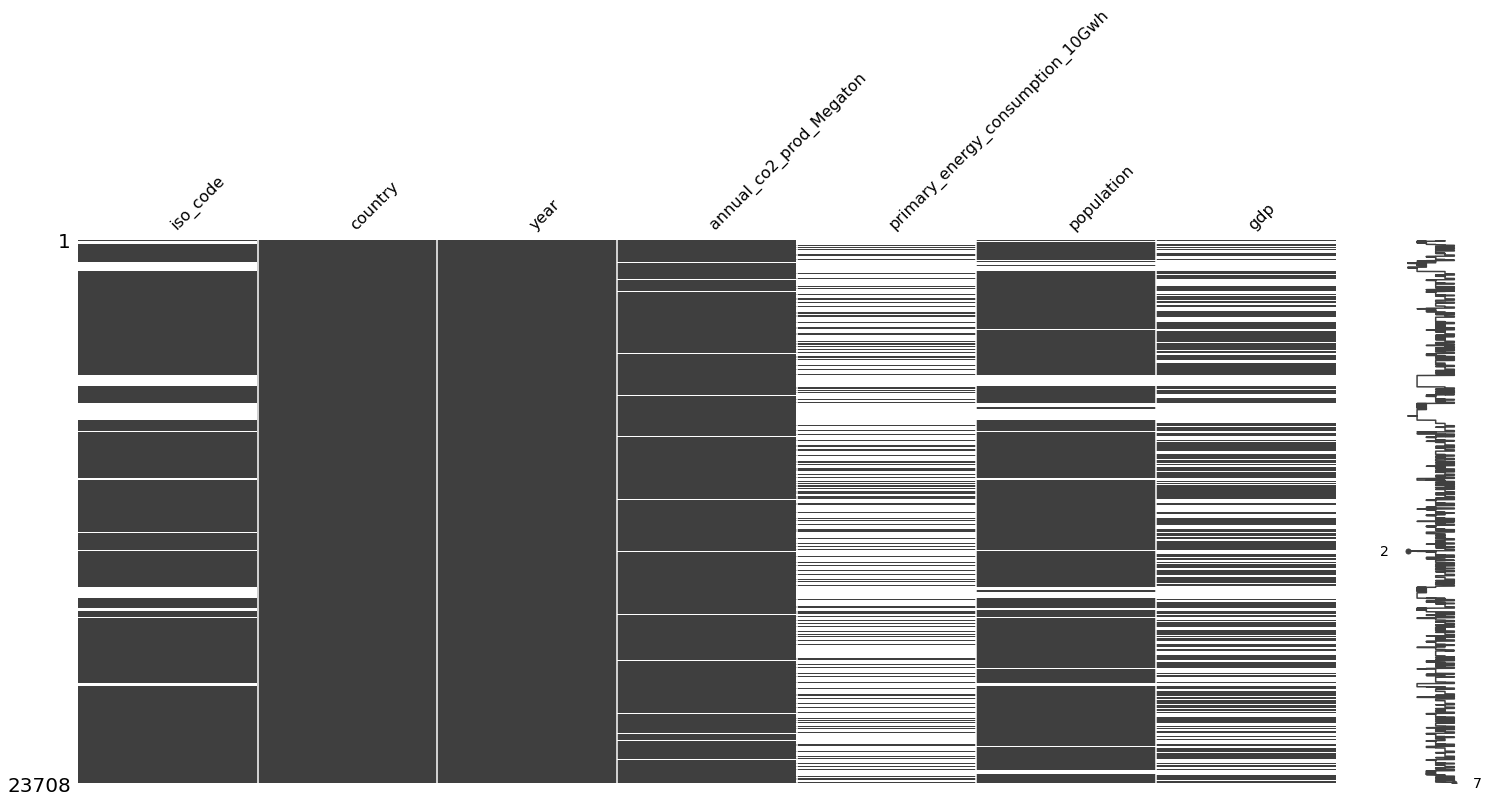

In [22]:
msno.matrix(co2_data)
plt.show()

In [23]:
co2_energy_data = co2_data.groupby('country')['primary_energy_consumption_10Gwh'].mean().sort_values(ascending=False)
co2_energy_data.head(20)

country
World             96268.492250
United States     21604.201947
China             12098.535923
Russia             8190.394531
Japan              4462.682351
Germany            3701.785614
India              2968.743365
Canada             2720.967421
United Kingdom     2431.474211
France             2359.570632
Ukraine            1815.220562
Brazil             1672.067308
Italy              1654.387228
South Korea        1431.100462
Mexico             1252.000365
Saudi Arabia       1140.888192
Iran               1133.397596
Poland             1124.294439
Spain              1051.391421
Australia          1004.518175
Name: primary_energy_consumption_10Gwh, dtype: float64

In [24]:
agri_land_raw_data.columns

Index(['Country or Area', 'Element', 'Year', 'Unit', 'Value_agri_1000hectare',
       'Value Footnotes'],
      dtype='object')

In [25]:
column = ['Country or Area', 'Year', 'Unit', 'Value_agri_1000hectare']
agri_land_data = pd.DataFrame(agri_land_raw_data, columns = column)

In [26]:
agri_land_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14378 entries, 0 to 14377
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country or Area         14377 non-null  object 
 1   Year                    14369 non-null  float64
 2   Unit                    14369 non-null  object 
 3   Value_agri_1000hectare  14369 non-null  float64
dtypes: float64(2), object(2)
memory usage: 449.4+ KB


In [27]:
agri_land_data = agri_land_data.dropna(how='any')

In [28]:
missing = pd.concat([agri_land_data.isnull().sum(), 100 * agri_land_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count', '%'],ascending=False)

,count,%
Country or Area,0,0.0
Year,0,0.0
Unit,0,0.0
Value_agri_1000hectare,0,0.0


In [29]:
agri_land_data['Year'] = agri_land_data.Year.astype(int).astype(str)
agri_land_data['Year'] = pd.to_datetime(agri_land_data['Year'])
agri_land_data

,Country or Area,Year,Unit,Value_agri_1000hectare
0,Afghanistan,2018-01-01,1000 ha,37919.0
1,Afghanistan,2017-01-01,1000 ha,37910.0
2,Afghanistan,2016-01-01,1000 ha,37910.0
3,Afghanistan,2015-01-01,1000 ha,37910.0
4,Afghanistan,2014-01-01,1000 ha,37910.0
...,...,...,...,...
14364,Zimbabwe,1965-01-01,1000 ha,11305.0
14365,Zimbabwe,1964-01-01,1000 ha,11240.0
14366,Zimbabwe,1963-01-01,1000 ha,11155.0
14367,Zimbabwe,1962-01-01,1000 ha,11070.0


In [30]:
beef_prod_raw_data.columns

Index(['Country or Area', 'Element', 'Year', 'Unit', 'Value_beef_tonnes',
       'Value Footnotes'],
      dtype='object')

In [31]:
beef_prod_raw_data.head()

,Country or Area,Element,Year,Unit,Value_beef_tonnes,Value Footnotes
0,Afghanistan,Production,2018.0,tonnes,129691.0,A
1,Afghanistan,Production,2017.0,tonnes,128357.0,A
2,Afghanistan,Production,2016.0,tonnes,134747.0,A
3,Afghanistan,Production,2015.0,tonnes,136428.0,A
4,Afghanistan,Production,2014.0,tonnes,137429.0,A


In [32]:
column = ['Country or Area', 'Year', 'Unit', 'Value_beef_tonnes']
beef_prod_data = pd.DataFrame(beef_prod_raw_data, columns = column)

In [33]:
beef_prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13197 entries, 0 to 13196
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country or Area    13196 non-null  object 
 1   Year               13194 non-null  float64
 2   Unit               13194 non-null  object 
 3   Value_beef_tonnes  13194 non-null  float64
dtypes: float64(2), object(2)
memory usage: 412.5+ KB


In [34]:
beef_prod_data = beef_prod_data.dropna(how='any')

In [35]:
missing = pd.concat([beef_prod_data.isnull().sum(), 100 * beef_prod_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count', '%'],ascending=False)

,count,%
Country or Area,0,0.0
Year,0,0.0
Unit,0,0.0
Value_beef_tonnes,0,0.0


In [36]:
beef_prod_data['Year'] = beef_prod_data.Year.astype(int).astype(str)
beef_prod_data['Year'] = pd.to_datetime(beef_prod_data['Year'])
beef_prod_data

,Country or Area,Year,Unit,Value_beef_tonnes
0,Afghanistan,2018-01-01,tonnes,129691.0
1,Afghanistan,2017-01-01,tonnes,128357.0
2,Afghanistan,2016-01-01,tonnes,134747.0
3,Afghanistan,2015-01-01,tonnes,136428.0
4,Afghanistan,2014-01-01,tonnes,137429.0
...,...,...,...,...
13189,Zimbabwe,1965-01-01,tonnes,53440.0
13190,Zimbabwe,1964-01-01,tonnes,52605.0
13191,Zimbabwe,1963-01-01,tonnes,55945.0
13192,Zimbabwe,1962-01-01,tonnes,54375.0


### 1.5.2 Join tables

In [37]:
agri_and_beef = pd.merge(agri_land_data,beef_prod_data, how='outer', on=['Country or Area', 'Year'], 
                         sort=False, suffixes = ('_argi','_beef'))

In [38]:
agri_and_beef

,Country or Area,Year,Unit_argi,Value_agri_1000hectare,Unit_beef,Value_beef_tonnes
0,Afghanistan,2018-01-01,1000 ha,37919.0,tonnes,129691.0
1,Afghanistan,2017-01-01,1000 ha,37910.0,tonnes,128357.0
2,Afghanistan,2016-01-01,1000 ha,37910.0,tonnes,134747.0
3,Afghanistan,2015-01-01,1000 ha,37910.0,tonnes,136428.0
4,Afghanistan,2014-01-01,1000 ha,37910.0,tonnes,137429.0
...,...,...,...,...,...,...
14431,Netherlands Antilles (former),2014-01-01,NaN,NaN,tonnes,22.0
14432,Netherlands Antilles (former),2013-01-01,NaN,NaN,tonnes,23.0
14433,Netherlands Antilles (former),2012-01-01,NaN,NaN,tonnes,23.0
14434,Netherlands Antilles (former),2011-01-01,NaN,NaN,tonnes,20.0


In [39]:
for i  in range(len(agri_and_beef['Country or Area'])):
    agri_and_beef['Country or Area'][i] = agri_and_beef['Country or Area'][i].replace(' (former)','')
    
agri_and_beef

<ipython-input-39-e03947957801>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agri_and_beef['Country or Area'][i] = agri_and_beef['Country or Area'][i].replace(' (former)','')


,Country or Area,Year,Unit_argi,Value_agri_1000hectare,Unit_beef,Value_beef_tonnes
0,Afghanistan,2018-01-01,1000 ha,37919.0,tonnes,129691.0
1,Afghanistan,2017-01-01,1000 ha,37910.0,tonnes,128357.0
2,Afghanistan,2016-01-01,1000 ha,37910.0,tonnes,134747.0
3,Afghanistan,2015-01-01,1000 ha,37910.0,tonnes,136428.0
4,Afghanistan,2014-01-01,1000 ha,37910.0,tonnes,137429.0
...,...,...,...,...,...,...
14431,Netherlands Antilles,2014-01-01,NaN,NaN,tonnes,22.0
14432,Netherlands Antilles,2013-01-01,NaN,NaN,tonnes,23.0
14433,Netherlands Antilles,2012-01-01,NaN,NaN,tonnes,23.0
14434,Netherlands Antilles,2011-01-01,NaN,NaN,tonnes,20.0


In [40]:
co2_data2 = pd.merge(co2_data,agri_and_beef, how='outer', left_on=['country','year'],
                         right_on=['Country or Area', 'Year'], sort=False).drop(columns=['Country or Area', 'Year'], inplace=False)

In [41]:
co2_data = co2_data2.dropna(subset=['country', 'year','annual_co2_prod_Megaton'])

In [42]:
co2_data.columns

Index(['iso_code', 'country', 'year', 'annual_co2_prod_Megaton',
       'primary_energy_consumption_10Gwh', 'population', 'gdp', 'Unit_argi',
       'Value_agri_1000hectare', 'Unit_beef', 'Value_beef_tonnes'],
      dtype='object')

In [43]:
co2_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23171 entries, 0 to 23708
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   iso_code                          20440 non-null  object        
 1   country                           23171 non-null  object        
 2   year                              23171 non-null  datetime64[ns]
 3   annual_co2_prod_Megaton           23171 non-null  float64       
 4   primary_energy_consumption_10Gwh  6045 non-null   float64       
 5   population                        20583 non-null  float64       
 6   gdp                               12973 non-null  float64       
 7   Unit_argi                         9818 non-null   object        
 8   Value_agri_1000hectare            9818 non-null   float64       
 9   Unit_beef                         9377 non-null   object        
 10  Value_beef_tonnes                 9377 non-nul

In [44]:
co2_data.describe()

,annual_co2_prod_Megaton,primary_energy_consumption_10Gwh,population,gdp,Value_agri_1000hectare,Value_beef_tonnes
count,23171.000000,6045.000000,2.058300e+04,1.297300e+04,9.818000e+03,9.377000e+03
mean,270.234760,1638.034068,6.053309e+07,4.405589e+11,7.341125e+04,7.789382e+05
std,1509.880287,9665.709679,3.773372e+08,3.670729e+12,3.935006e+05,4.531116e+06
min,-1.165000,0.208000,1.000000e+03,6.378000e+07,3.000000e-01,0.000000e+00
25%,0.546000,46.326000,1.433000e+06,8.911988e+09,3.340000e+02,3.233000e+03
50%,5.170000,148.688000,5.004000e+06,2.946853e+10,3.495500e+03,4.080000e+04
75%,44.785000,518.789000,1.632450e+07,1.220000e+11,2.052425e+04,1.705510e+05
max,36441.388000,153848.433000,7.713468e+09,1.065610e+14,4.882180e+06,7.160131e+07


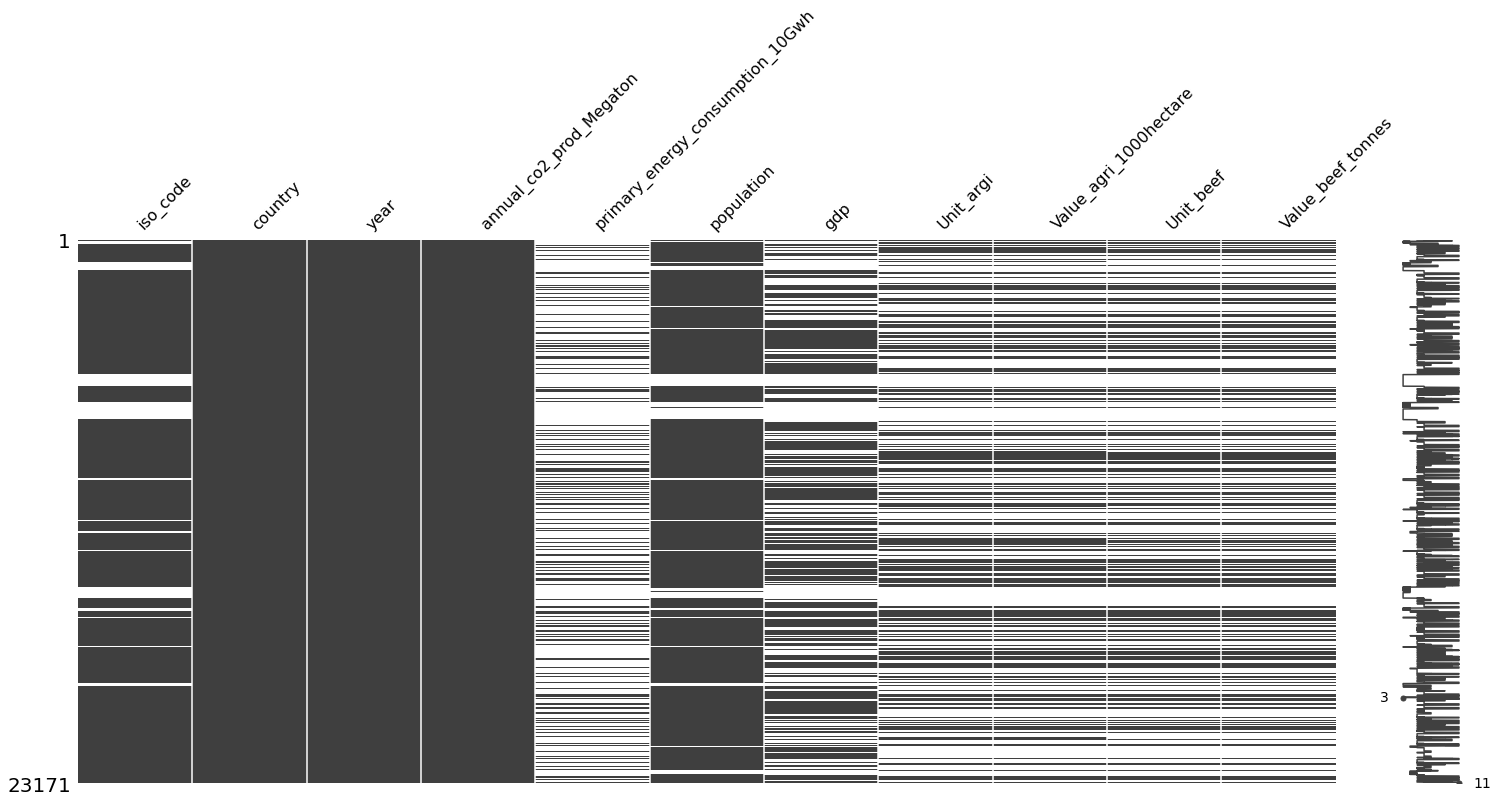

In [45]:
msno.matrix(co2_data)
plt.show()

### 1.5.3 Add columns (move this to notebook 3)

In [46]:
# co2_data['energy_isnan'] = np.isnan(co2_data['primary_energy_consumption_10Gwh'])
# co2_data['gdp_isnan'] = np.isnan(co2_data['gdp'])
# co2_data['population_isnan'] = np.isnan(co2_data['population'])
# co2_data['argi_isnan'] = np.isnan(co2_data['Value_agri_1000hectare'])
# co2_data['beef_isnan'] = np.isnan(co2_data['Value_beef_tonnes'])
# print(co2_data.head())

In [47]:
# add columns relate countries to developed and undeveloped
# add columns relate countries to region/continent

## 1.6 Save data

In [48]:
co2_data.shape

(23171, 11)

In [49]:
# save the data to a new csv file
datapath = '../data'
save_file(co2_data, 'co2_data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/co2_data_cleaned.csv"
